In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# get ANOVA table as R like output
import statsmodels.api as sm
from statsmodels.formula.api import ols
# post-hoc tests:
from bioinfokit.analys import stat
from scipy.stats import ttest_rel

## 1. Loading the data

Data is available from the EDMOND repository [Modulation of behavior in zebrafish by the neuropeptide PTH2](https://dx.doi.org/10.17617/3.6v). Individual data files should be placed within the same folder as the scripts, otherwise, file locations need to be updated in the cell below. 

The _social preference_ dataframe contains 5 columns: 
- **experiment** either _tripartite_ or _uchamber_, indicating whether the data was obtained in the open field or the forced-choice paradigm.
- **genotype**: either _wt_ (for $pth2^{+/+}$) or _ko_ (fo $pth2^{-/-}$).
- **rearing** either _social_ (rearing in groups of defined size as of 3 days post fertilization) or _isolated_ (rearing alone as of 3 dpf).
- **age**: either 21 or 56 dpf.
- **value**: number between -1 and 1, indicating the social preference index.

In [2]:
df = pd.read_excel(r'.\SocialPreference.xlsx' , sheet_name = 'import')
df.head()

,experiment,genotype,rearing,condition,age,value
0,tripartite,wt,social,habituation,21,0.987041
1,tripartite,wt,social,habituation,21,0.465862
2,tripartite,wt,social,habituation,21,0.534656
3,tripartite,wt,social,habituation,21,-0.175865
4,tripartite,wt,social,habituation,21,-0.165197


## Figure 3 b - d and f - h

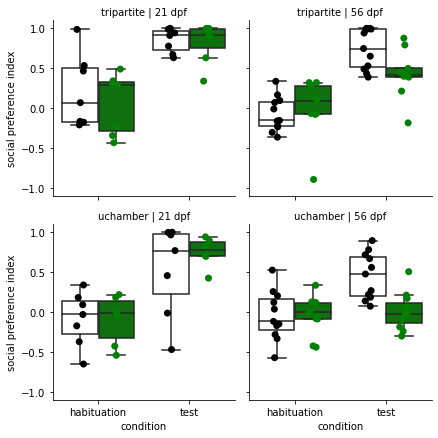

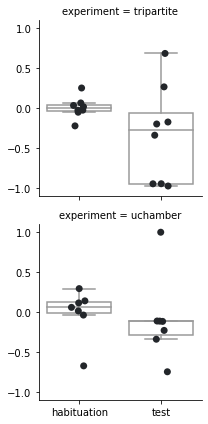

In [5]:
g = sns.FacetGrid(data = df[df['rearing']=='social'], col = 'age' , row = 'experiment')
g.map_dataframe(sns.boxplot , x = 'condition', y = 'value' , hue = 'genotype' , showfliers = 0, palette = ['w', 'g'])
g.map_dataframe(sns.stripplot , x = 'condition' , y = 'value' , hue = 'genotype' , size = 7, dodge = True ,  palette = ['k', 'g'])
g.set_axis_labels("condition", "social preference index")
g.set_titles(col_template="{col_name} dpf", row_template="{row_name}")
g.set(ylim=(-1.1, 1.1))


f = sns.FacetGrid(data = df[df['rearing']=='isolated'], row = 'experiment')
f.map_dataframe(sns.boxplot , x = 'condition', y = 'value' , hue = 'genotype' , showfliers = 0, palette = ['w'])
f.map_dataframe(sns.stripplot , x = 'condition' , y = 'value' , hue = 'genotype' , size = 7, dodge = True)
f.set(ylim=(-1.1, 1.1))


In [24]:
# Statistical Evaluation

df_uchamber = df[df['experiment'] == 'uchamber']
df_uchamber_21 = df_uchamber[df_uchamber['age'] == 21]
df_uchamber_56 = df_uchamber[df_uchamber['age'] == 56]
df_uchamber_56_social = df_uchamber_56[df_uchamber_56['rearing'] == "social"]
df_dreosti_56_iso = df_dreosti_56[df_dreosti_56['rearing'] == "isolated"]

df_tripartite = df[df['experiment'] == 'tripartite']
df_tripartite_21 = df_tripartite[df_tripartite['age'] == 21]
df_tripartite_56 = df_tripartite[df_tripartite['age'] == 56]
df_tripartite_56_social = df_tripartite_56[df_tripartite_56['rearing'] == "social"]
df_tripartite_56_iso = df_tripartite_56[df_tripartite_56['rearing'] == "isolated"]

# for 21 dpf, forced-choice paradigm:
# Ordinary Least Squares (OLS) model
model = ols('value ~ genotype * condition', data=df_dreosti_21).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
genotype,0.070038,1.0,0.459029,0.505141
condition,3.420371,1.0,22.417146,0.000100
genotype:condition,0.088304,1.0,0.578743,0.454883
Residual,3.356724,22.0,NaN,NaN


In [19]:
# for 21 dpf, open-field paradigm:
# Ordinary Least Squares (OLS) model
model = ols('value ~ genotype * condition', data=df_tripartite_21).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
genotype,0.057210,1.0,0.521572,0.477150
condition,3.394703,1.0,30.948560,0.000010
genotype:condition,0.029371,1.0,0.267764,0.609573
Residual,2.632525,24.0,NaN,NaN


In [25]:
# for 56 dpf, socially reared, forced-choice paradigm:
# Ordinary Least Squares (OLS) model
model = ols('value ~ genotype * condition', data=df_dreosti_56_social).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
genotype,0.514937,1.0,7.206567,0.010518
condition,0.814141,1.0,11.393942,0.001649
genotype:condition,0.556723,1.0,7.791369,0.008009
Residual,2.858153,40.0,NaN,NaN


In [27]:
# perform multiple pairwise comparison (Tukey's HSD)
# for unequal sample size data, tukey_hsd uses Tukey-Kramer test
res = stat()
res.tukey_hsd(df=df_dreosti_56_social, res_var='value', xfac_var=['genotype', 'condition'], anova_model='value ~ genotype * condition')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,"(wt, habituation)","(wt, test)",0.497022,0.191486,0.802558,6.166794,0.001000
1,"(wt, habituation)","(ko, habituation)",0.008607,-0.296929,0.314144,0.106797,0.900000
2,"(wt, habituation)","(ko, test)",0.055691,-0.249845,0.361227,0.690986,0.900000
3,"(wt, test)","(ko, habituation)",0.488415,0.182879,0.793951,6.059996,0.001000
4,"(wt, test)","(ko, test)",0.441331,0.135795,0.746867,5.475807,0.002127
5,"(ko, habituation)","(ko, test)",0.047084,-0.258452,0.352620,0.584189,0.900000


In [34]:
# for 56 dpf, reared in isolation, forced-choice paradigm:
ttest_rel(df_dreosti_56_iso[df_dreosti_56_iso['condition'] == 'habituation']['value'] , 
               df_dreosti_56_iso[df_dreosti_56_iso['condition'] == 'test']['value'])

Ttest_relResult(statistic=0.5795302313921782, pvalue=0.5833202970424337)

In [36]:
# for 56 dpf, open-field paradigm:
# Ordinary Least Squares (OLS) model
model = ols('value ~ genotype * condition', data=df_tripartite_56_social).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
genotype,0.138668,1.0,1.666647,2.049372e-01
condition,4.057131,1.0,48.762637,3.455530e-08
genotype:condition,0.374165,1.0,4.497082,4.091020e-02
Residual,2.995259,36.0,NaN,NaN


In [35]:
# perform multiple pairwise comparison (Tukey's HSD)
# for unequal sample size data, tukey_hsd uses Tukey-Kramer test
res = stat()
res.tukey_hsd(df=df_tripartite_56_social, res_var='value', xfac_var=['genotype', 'condition'], anova_model='value ~ genotype * condition')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,"(wt, habituation)","(wt, test)",0.811923,0.480669,1.143178,9.335667,0.001000
1,"(wt, habituation)","(ko, habituation)",0.076057,-0.273116,0.425230,0.829645,0.900000
2,"(wt, habituation)","(ko, test)",0.499165,0.149992,0.848338,5.444972,0.002520
3,"(wt, test)","(ko, habituation)",0.735866,0.386693,1.085039,8.026946,0.001000
4,"(wt, test)","(ko, test)",0.312758,-0.036415,0.661931,3.411619,0.092726
5,"(ko, habituation)","(ko, test)",0.423108,0.056892,0.789323,4.400541,0.018224


In [37]:
# for 56 dpf, reared in isolation, open-field paradigm:
ttest_rel(df_tripartite_56_iso[df_tripartite_56_iso['condition'] == 'habituation']['value'] , 
               df_tripartite_56_iso[df_tripartite_56_iso['condition'] == 'test']['value'])

Ttest_relResult(statistic=1.380090086154627, pvalue=0.21002347794227583)